In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Посмотрим на тренировочную выборку и разметим её

In [2]:
chunksize = 10 ** 7
num_of_chunk = 0
train = pd.DataFrame()

for chunk in pd.read_csv('/kaggle/input/avazu-ctr-prediction/train.gz',chunksize=chunksize):
    num_of_chunk = num_of_chunk + 1
    train = pd.concat([train,chunk.sample(frac=0.01)],axis = 0,ignore_index = True)
    print(f'NUMBER {str(num_of_chunk)} is done.')

NUMBER 1 is done.
NUMBER 2 is done.
NUMBER 3 is done.
NUMBER 4 is done.
NUMBER 5 is done.


In [3]:
train

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.342230e+19,0,14102114,1005,0,85f751fd,c4e18dd6,50e219e0,fb7c70a3,d9b5648e,...,1,0,21746,320,50,2504,3,41,100160,111
1,2.211752e+18,0,14102222,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,21828,320,50,2522,0,35,-1,221
2,3.708783e+17,0,14102118,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,...,1,0,20251,320,50,2323,0,687,100081,48
3,1.432295e+19,0,14102206,1005,1,b7e9786d,b12b9f85,f028772b,ecad2386,7801e8d9,...,1,0,19950,320,50,1800,3,167,100075,23
4,1.288064e+19,0,14102221,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,...,1,0,18093,320,50,2060,3,39,100050,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1.669900e+18,0,14103020,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
404286,9.437532e+18,0,14103021,1005,0,85f751fd,c4e18dd6,50e219e0,d44c074c,ae637522,...,1,3,23744,320,50,2721,1,161,100192,71
404287,7.292141e+18,0,14103020,1005,0,85f751fd,c4e18dd6,50e219e0,be7c618d,2347f47a,...,1,2,23013,320,50,2658,3,35,100148,23
404288,6.230077e+18,0,14103021,1005,0,85f751fd,c4e18dd6,50e219e0,090d3a47,0654b444,...,1,0,23722,320,50,2716,3,47,-1,23


In [4]:
train = train.drop(columns=['id', 'site_id', 'site_domain', 'app_id',
                            'app_domain', 'device_id', 'device_ip', 'device_model'])

In [5]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102114,1005,0,50e219e0,0f2161f8,1,0,21746,320,50,2504,3,41,100160,111
1,0,14102222,1005,0,f028772b,07d7df22,1,0,21828,320,50,2522,0,35,-1,221
2,0,14102118,1005,0,f028772b,07d7df22,1,0,20251,320,50,2323,0,687,100081,48
3,0,14102206,1005,1,f028772b,07d7df22,1,0,19950,320,50,1800,3,167,100075,23
4,0,14102221,1005,0,50e219e0,cef3e649,1,0,18093,320,50,2060,3,39,100050,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,14103020,1005,0,50e219e0,0f2161f8,1,0,4687,320,50,423,2,39,100148,32
404286,0,14103021,1005,0,50e219e0,cef3e649,1,3,23744,320,50,2721,1,161,100192,71
404287,0,14103020,1005,0,50e219e0,f95efa07,1,2,23013,320,50,2658,3,35,100148,23
404288,0,14103021,1005,0,50e219e0,0f2161f8,1,0,23722,320,50,2716,3,47,-1,23


In [6]:
train['hour'] = pd.to_datetime(train['hour'], format = '%y%m%d%H')

In [7]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,2014-10-21 14:00:00,1005,0,50e219e0,0f2161f8,1,0,21746,320,50,2504,3,41,100160,111
1,0,2014-10-22 22:00:00,1005,0,f028772b,07d7df22,1,0,21828,320,50,2522,0,35,-1,221
2,0,2014-10-21 18:00:00,1005,0,f028772b,07d7df22,1,0,20251,320,50,2323,0,687,100081,48
3,0,2014-10-22 06:00:00,1005,1,f028772b,07d7df22,1,0,19950,320,50,1800,3,167,100075,23
4,0,2014-10-22 21:00:00,1005,0,50e219e0,cef3e649,1,0,18093,320,50,2060,3,39,100050,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,2014-10-30 20:00:00,1005,0,50e219e0,0f2161f8,1,0,4687,320,50,423,2,39,100148,32
404286,0,2014-10-30 21:00:00,1005,0,50e219e0,cef3e649,1,3,23744,320,50,2721,1,161,100192,71
404287,0,2014-10-30 20:00:00,1005,0,50e219e0,f95efa07,1,2,23013,320,50,2658,3,35,100148,23
404288,0,2014-10-30 21:00:00,1005,0,50e219e0,0f2161f8,1,0,23722,320,50,2716,3,47,-1,23


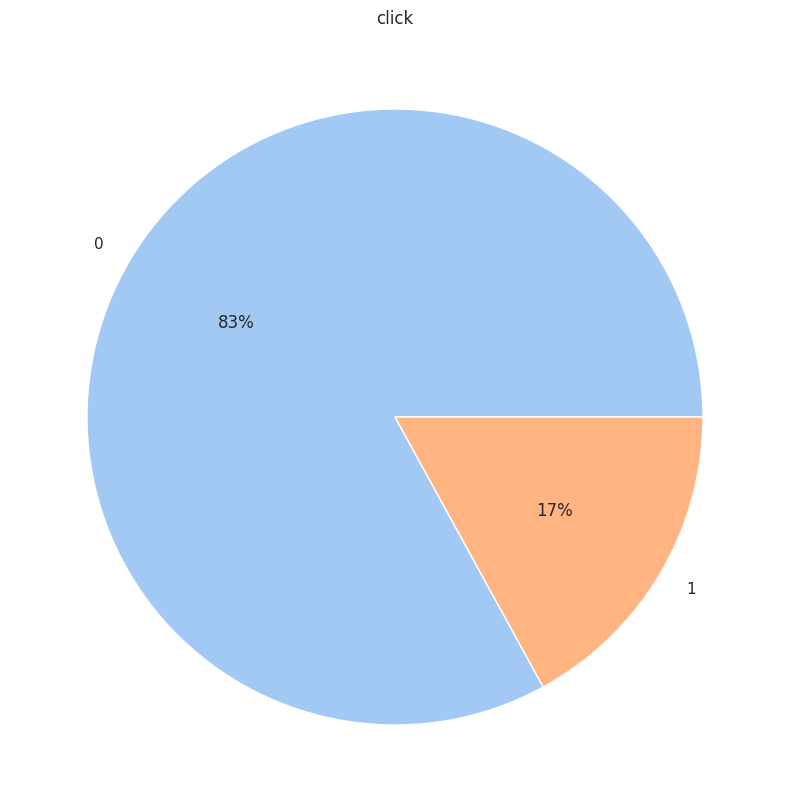

In [8]:
sns.set(rc={'figure.figsize': (10, 10)})
colors = sns.color_palette('pastel')[0:5]
labels = sorted(train['click'].unique())
dt = np.array([len(train[train['click'] == i])for i in labels])
plt.pie(dt, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('click')
plt.show()

<Axes: xlabel='hour', ylabel='click'>

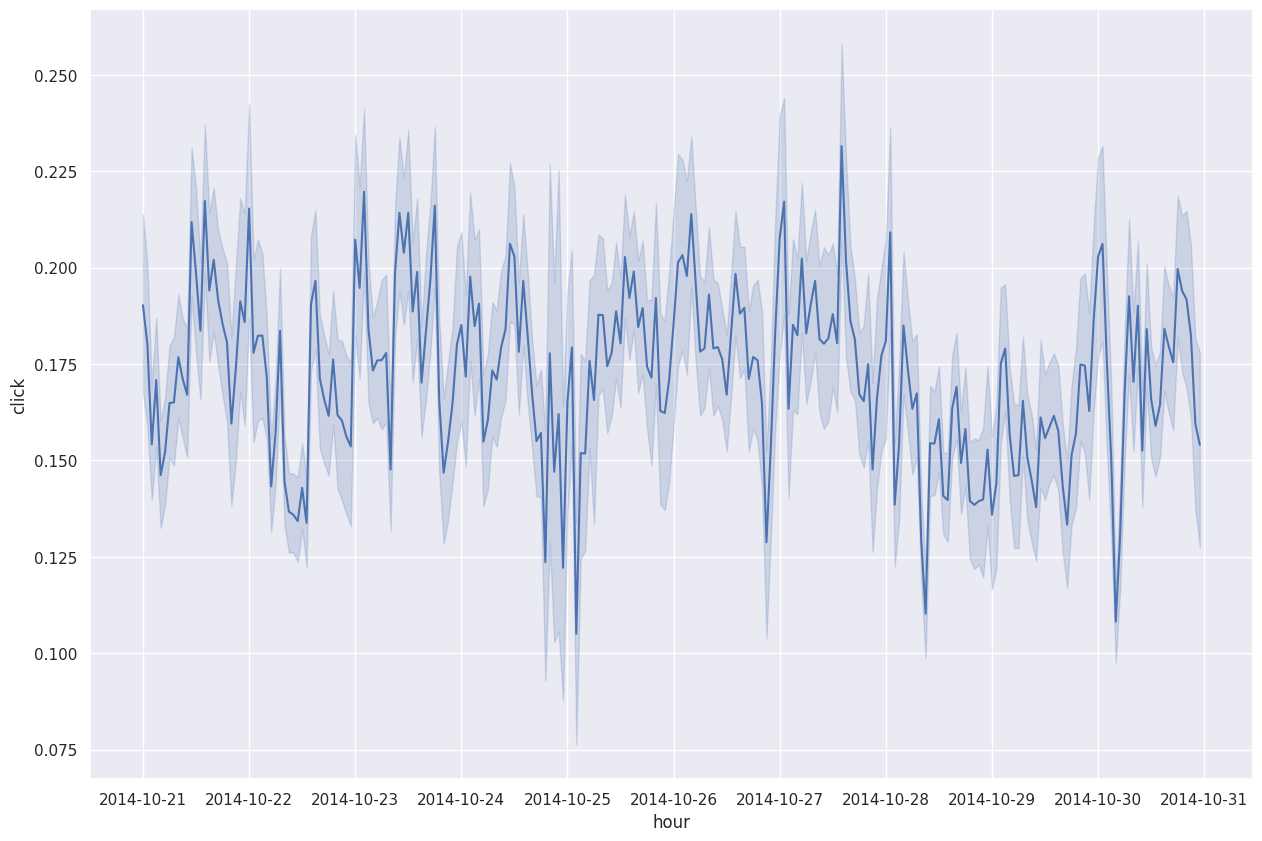

In [9]:
sns.set(rc={'figure.figsize': (15, 10)})

sns.lineplot(data=train, x='hour', y='click')

In [10]:
features = {
    'hour': [],
    'day': []
}

for elem in train['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    train[elem] = features[elem]

In [11]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,14,1005,0,50e219e0,0f2161f8,1,0,21746,320,50,2504,3,41,100160,111,21
1,0,22,1005,0,f028772b,07d7df22,1,0,21828,320,50,2522,0,35,-1,221,22
2,0,18,1005,0,f028772b,07d7df22,1,0,20251,320,50,2323,0,687,100081,48,21
3,0,6,1005,1,f028772b,07d7df22,1,0,19950,320,50,1800,3,167,100075,23,22
4,0,21,1005,0,50e219e0,cef3e649,1,0,18093,320,50,2060,3,39,100050,23,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,20,1005,0,50e219e0,0f2161f8,1,0,4687,320,50,423,2,39,100148,32,30
404286,0,21,1005,0,50e219e0,cef3e649,1,3,23744,320,50,2721,1,161,100192,71,30
404287,0,20,1005,0,50e219e0,f95efa07,1,2,23013,320,50,2658,3,35,100148,23,30
404288,0,21,1005,0,50e219e0,0f2161f8,1,0,23722,320,50,2716,3,47,-1,23,30


In [12]:
train.isnull().sum()

click               0
hour                0
C1                  0
banner_pos          0
site_category       0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   click             404290 non-null  int64 
 1   hour              404290 non-null  int64 
 2   C1                404290 non-null  int64 
 3   banner_pos        404290 non-null  int64 
 4   site_category     404290 non-null  object
 5   app_category      404290 non-null  object
 6   device_type       404290 non-null  int64 
 7   device_conn_type  404290 non-null  int64 
 8   C14               404290 non-null  int64 
 9   C15               404290 non-null  int64 
 10  C16               404290 non-null  int64 
 11  C17               404290 non-null  int64 
 12  C18               404290 non-null  int64 
 13  C19               404290 non-null  int64 
 14  C20               404290 non-null  int64 
 15  C21               404290 non-null  int64 
 16  day               404290 non-null  int

In [14]:
train['site_category'] = train['site_category'].astype('category')
train['site_category'] = train['site_category'].cat.codes

train['app_category'] = train['app_category'].astype('category')
train['app_category'] = train['app_category'].cat.codes

In [15]:
train

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,14,1005,0,5,4,1,0,21746,320,50,2504,3,41,100160,111,21
1,0,22,1005,0,19,0,1,0,21828,320,50,2522,0,35,-1,221,22
2,0,18,1005,0,19,0,1,0,20251,320,50,2323,0,687,100081,48,21
3,0,6,1005,1,19,0,1,0,19950,320,50,1800,3,167,100075,23,22
4,0,21,1005,0,5,21,1,0,18093,320,50,2060,3,39,100050,23,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,20,1005,0,5,4,1,0,4687,320,50,423,2,39,100148,32,30
404286,0,21,1005,0,5,21,1,3,23744,320,50,2721,1,161,100192,71,30
404287,0,20,1005,0,5,24,1,2,23013,320,50,2658,3,35,100148,23,30
404288,0,21,1005,0,5,4,1,0,23722,320,50,2716,3,47,-1,23,30


In [16]:
train.describe()

,click,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,0.170093,11.276292,1004.966925,0.288325,8.641267,3.242264,1.015400,0.330619,18849.553439,318.839101,60.041693,2113.472028,1.432494,228.413612,53312.421972,83.454538,25.470435
std,0.375715,5.955744,1.095658,0.507891,7.293492,6.362912,0.528751,0.853344,4952.209683,20.890323,47.144481,608.685611,1.326677,352.283455,49950.643383,70.330035,2.965338
min,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,21.000000
25%,0.000000,7.000000,1005.000000,0.000000,3.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,23.000000
50%,0.000000,11.000000,1005.000000,0.000000,5.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,26.000000
75%,0.000000,16.000000,1005.000000,1.000000,19.000000,4.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,175.000000,100086.000000,101.000000,28.000000
max,1.000000,23.000000,1012.000000,7.000000,20.000000,25.000000,5.000000,5.000000,24052.000000,1024.000000,1024.000000,2758.000000,3.000000,1839.000000,100248.000000,255.000000,30.000000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   click             404290 non-null  int64
 1   hour              404290 non-null  int64
 2   C1                404290 non-null  int64
 3   banner_pos        404290 non-null  int64
 4   site_category     404290 non-null  int8 
 5   app_category      404290 non-null  int8 
 6   device_type       404290 non-null  int64
 7   device_conn_type  404290 non-null  int64
 8   C14               404290 non-null  int64
 9   C15               404290 non-null  int64
 10  C16               404290 non-null  int64
 11  C17               404290 non-null  int64
 12  C18               404290 non-null  int64
 13  C19               404290 non-null  int64
 14  C20               404290 non-null  int64
 15  C21               404290 non-null  int64
 16  day               404290 non-null  int64
dtypes: int64(1

<Axes: >

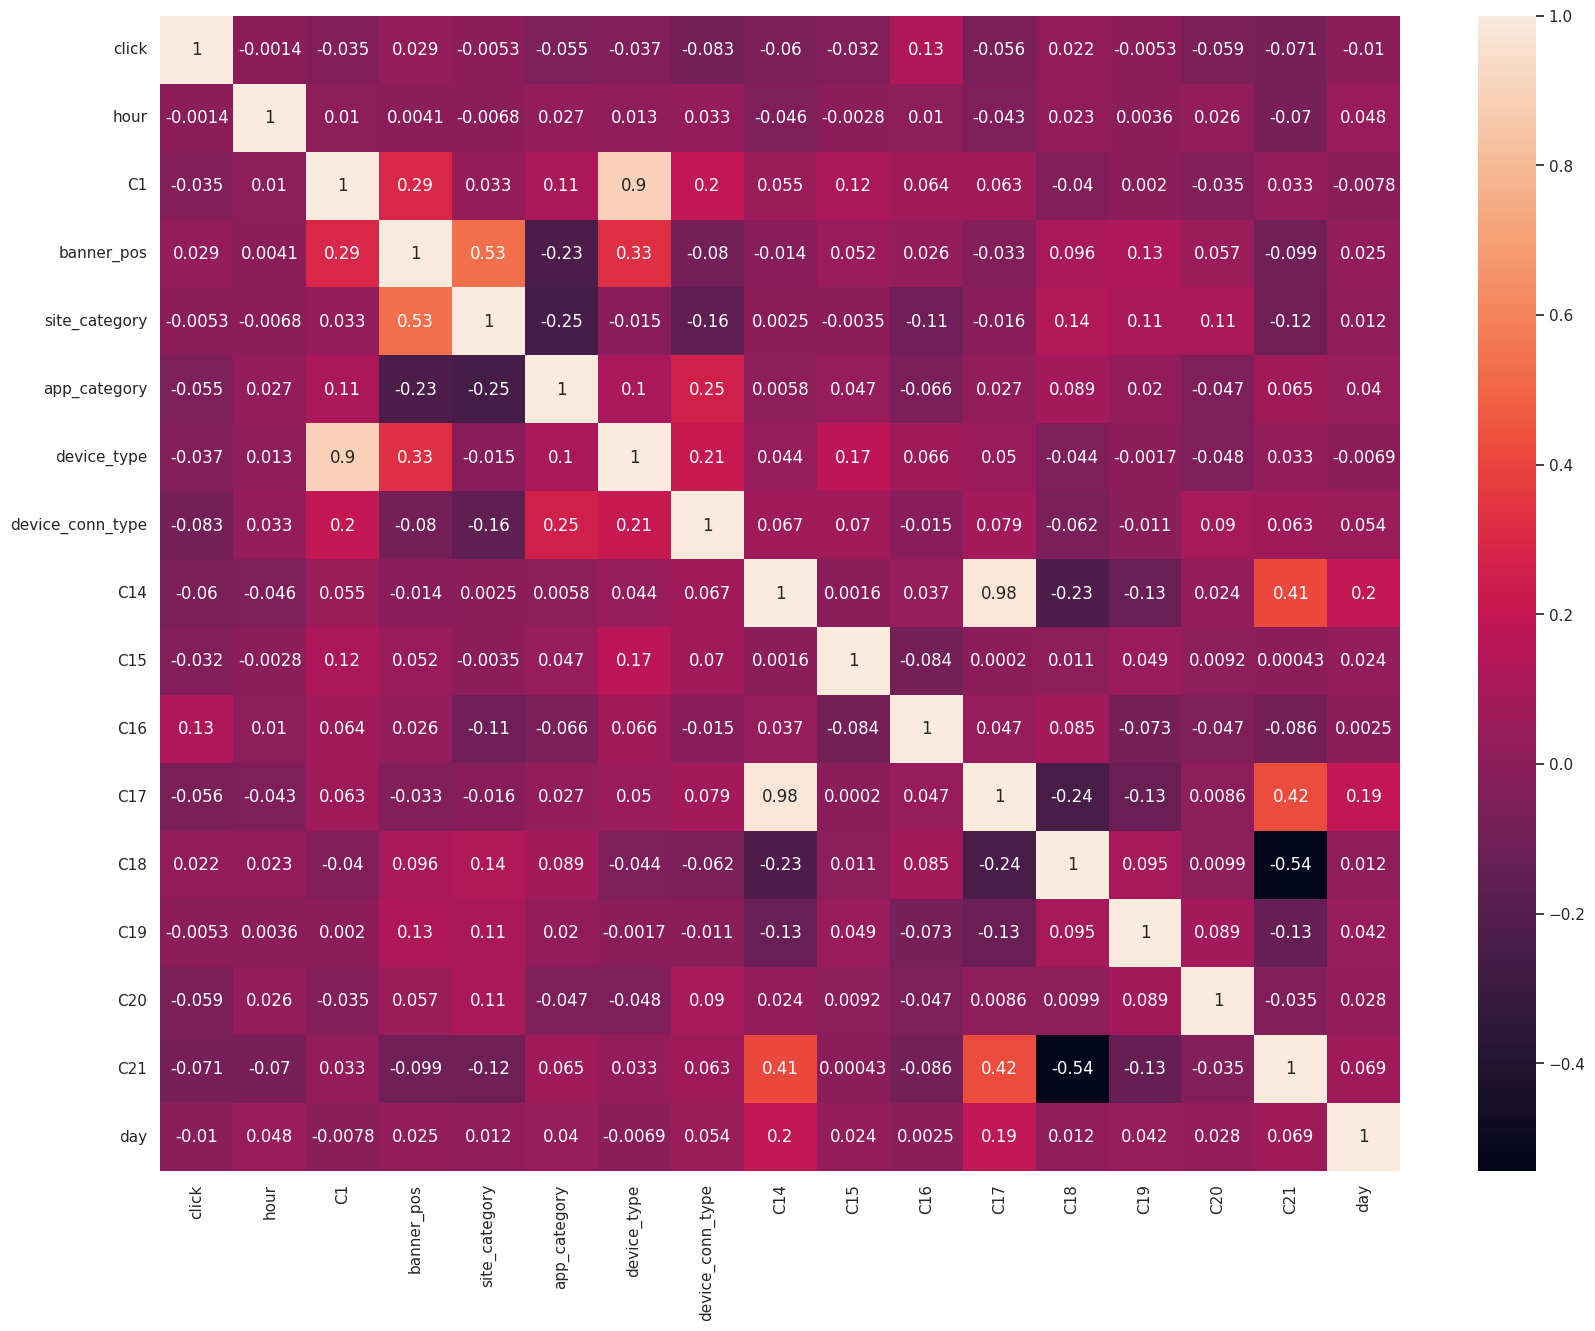

In [18]:
corr_matrix = train.corr()

sns.set(rc={'figure.figsize': (20, 15)})

sns.heatmap(corr_matrix, annot=True)

In [19]:
import math
from sklearn import preprocessing

scaled = preprocessing.StandardScaler()

scaled.fit(train.drop(columns=['click']), train['click'])

# def scale_features(X, Y):
#     scaled = .fit_transform(X, Y)
#     scaled = pd.DataFrame(scaled, columns=df.columns)
#     return scaled

StandardScaler()

In [20]:
df_scaled = scaled.transform(train.drop(columns=['click']))

In [21]:
df_scaled

array([[ 0.45732516,  0.03018761, -0.56769148, ...,  0.93787853,
         0.39166049, -1.50756529],
       [ 1.80056788,  0.03018761, -0.56769148, ..., -1.06732335,
         1.95571681, -1.17033515],
       [ 1.12894652,  0.03018761, -0.56769148, ...,  0.93629697,
        -0.50411721, -1.50756529],
       ...,
       [ 1.4647572 ,  0.03018761, -0.56769148, ...,  0.93763829,
        -0.85958456,  1.52750599],
       [ 1.63266254,  0.03018761, -0.56769148, ..., -1.06732335,
        -0.85958456,  1.52750599],
       [ 1.96847322,  0.03018761, -0.56769148, ...,  0.93867932,
        -0.85958456,  1.52750599]])

In [22]:
df_scaled.shape

(404290, 16)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=8)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.16349742 0.13724733 0.11041924 0.07967241 0.07637521 0.06370609
 0.06136284 0.05724179]


In [25]:
print(pca.components_)

[[ 0.04248331 -0.14209282  0.07941228  0.12713216 -0.08467366 -0.14026357
  -0.14844397 -0.52643775 -0.02747049 -0.00685809 -0.533584    0.33398675
   0.15224856  0.02004687 -0.4348558  -0.14063544]
 [ 0.0281136   0.58901188  0.41531774  0.19507412  0.01794307  0.59728311
   0.14790348 -0.04691073  0.17254148  0.04421153 -0.04834867  0.08473747
   0.0964362   0.01558408 -0.09899051 -0.00125931]
 [ 0.05524007  0.15622673 -0.42390155 -0.54405123  0.45996146  0.17083709
   0.34136284 -0.23175481  0.08170325  0.02926808 -0.21039048 -0.00128854
  -0.08516772 -0.13346911 -0.01698725 -0.09335301]
 [ 0.18638368 -0.12904362 -0.02344553  0.08662445  0.32051165 -0.13279708
   0.30300709  0.15879828  0.17553215 -0.19582548  0.15049203  0.31873122
   0.3662573   0.38554637 -0.17853898  0.44170039]
 [ 0.10713727  0.02890889 -0.02205226 -0.10083323  0.01170734  0.0176557
  -0.07120569  0.20197789 -0.25433539  0.64375429  0.20113061  0.43495258
  -0.22423154 -0.19368387 -0.31525172  0.18654202]
 [-0.6

In [26]:
zzz = pca.transform(df_scaled)

In [27]:
zzz

array([[-0.31808893, -0.40681408,  0.24024695, ..., -0.35807608,
        -0.59013354,  1.13420328],
       [-1.51385479, -0.38784717, -0.81513512, ..., -0.97370437,
         1.72893422,  0.184734  ],
       [ 0.23874566,  0.07764853, -1.06143196, ..., -1.2286881 ,
        -0.09614698,  0.27139952],
       ...,
       [-1.04436074,  0.11871117,  2.16859914, ..., -0.56089751,
         0.28961275,  0.07668572],
       [-0.58438825, -0.31889607,  0.14352602, ...,  0.27144639,
         2.0734113 ,  0.09377007],
       [-0.26919799, -0.29557767, -0.06561031, ..., -2.09657853,
         0.16360107,  0.41218617]])

In [28]:
zzz.shape

(404290, 8)

In [29]:
pd.DataFrame(pca.components_, columns=train.columns[1:])

,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0.042483,-0.142093,0.079412,0.127132,-0.084674,-0.140264,-0.148444,-0.526438,-0.027470,-0.006858,-0.533584,0.333987,0.152249,0.020047,-0.434856,-0.140635
1,0.028114,0.589012,0.415318,0.195074,0.017943,0.597283,0.147903,-0.046911,0.172541,0.044212,-0.048349,0.084737,0.096436,0.015584,-0.098991,-0.001259
2,0.055240,0.156227,-0.423902,-0.544051,0.459961,0.170837,0.341363,-0.231755,0.081703,0.029268,-0.210390,-0.001289,-0.085168,-0.133469,-0.016987,-0.093353
3,0.186384,-0.129044,-0.023446,0.086624,0.320512,-0.132797,0.303007,0.158798,0.175532,-0.195825,0.150492,0.318731,0.366257,0.385546,-0.178539,0.441700
4,0.107137,0.028909,-0.022052,-0.100833,0.011707,0.017656,-0.071206,0.201978,-0.254335,0.643754,0.201131,0.434953,-0.224232,-0.193684,-0.315252,0.186542
5,-0.628391,-0.033675,-0.023562,0.017215,0.181253,-0.016924,-0.214550,0.096623,0.382977,-0.163718,0.096188,0.262601,0.122278,-0.487571,-0.065771,0.077093
6,0.669331,-0.018563,0.023774,0.015088,-0.019260,0.005528,-0.252452,-0.043089,0.260045,-0.201147,-0.041245,-0.067316,-0.067212,-0.514517,0.057687,0.313017
7,0.084493,-0.083271,-0.074486,-0.030763,-0.209559,-0.038846,0.022419,0.074239,0.726192,0.098465,0.062558,0.107971,-0.452286,0.301468,-0.137074,-0.247262


In [30]:
pd.Series(pca.noise_variance_, train.columns[1:])

hour                0.500957
C1                  0.500957
banner_pos          0.500957
site_category       0.500957
app_category        0.500957
device_type         0.500957
device_conn_type    0.500957
C14                 0.500957
C15                 0.500957
C16                 0.500957
C17                 0.500957
C18                 0.500957
C19                 0.500957
C20                 0.500957
C21                 0.500957
day                 0.500957
dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
Y = train['click']

X_train, X_valid, Y_train, Y_valid = train_test_split(zzz, Y, test_size=0.1, random_state=42)

In [32]:
from sklearn.linear_model import SGDClassifier

In [98]:
sgd = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    n_iter_no_change=35,
    shuffle=True,
    max_iter=5500,
    warm_start=True
)

In [110]:
sgd.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

SGDClassifier(loss='log_loss', max_iter=5500, n_iter_no_change=35,
              warm_start=True)

In [111]:
from sklearn.metrics import log_loss


preds_val = sgd.predict_proba(X_valid)

In [112]:
preds_val = np.array(list(map(lambda x: x[1], preds_val)))

In [113]:
preds_val

array([0.20330446, 0.16759328, 0.16453055, ..., 0.166701  , 0.07034891,
       0.14449342])

In [114]:
log_loss(y_pred=preds_val, y_true=Y_valid)

0.4459016997274435

# Тоже самое сделаем с тестовой выбокрой

In [115]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [116]:
test_df = test_df.drop(columns=['id', 'site_id', 'site_domain', 'app_id',
                            'app_domain', 'device_id', 'device_ip', 'device_model'])

test_df['hour'] = pd.to_datetime(test_df['hour'], format = '%y%m%d%H')
features = {
    'hour': [],
    'day': []
}

for elem in test_df['hour'].map(str):
    year, month, day_hour = map(lambda x: int(x) if ' ' not in x else x, elem[:-6].split('-'))
    day, hour = map(int, day_hour.split())
    features['day'].append(day)
    features['hour'].append(hour)

for elem in features:
    test_df[elem] = features[elem]

In [117]:
test_df

,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,f028772b,07d7df22,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,28905ebd,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,28905ebd,07d7df22,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,50e219e0,0f2161f8,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,50e219e0,f95efa07,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,3e814130,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,f028772b,07d7df22,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,3e814130,07d7df22,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,50e219e0,0f2161f8,1,3,23857,320,50,2734,1,175,100189,71,31


In [118]:
test_df.isnull().sum()

hour                0
C1                  0
banner_pos          0
site_category       0
app_category        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
dtype: int64

In [119]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577464 entries, 0 to 4577463
Data columns (total 16 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hour              int64 
 1   C1                object
 2   banner_pos        object
 3   site_category     object
 4   app_category      object
 5   device_type       object
 6   device_conn_type  object
 7   C14               object
 8   C15               object
 9   C16               object
 10  C17               object
 11  C18               object
 12  C19               object
 13  C20               object
 14  C21               object
 15  day               int64 
dtypes: int64(2), object(14)
memory usage: 558.8+ MB


In [120]:
test_df['site_category'] = test_df['site_category'].astype('category')
test_df['site_category'] = test_df['site_category'].cat.codes

test_df['app_category'] = test_df['app_category'].astype('category')
test_df['app_category'] = test_df['app_category'].cat.codes

In [121]:
test_df

,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,0,1005,0,20,0,1,0,8330,320,50,761,3,175,100075,23,31
1,0,1005,0,1,0,1,0,22676,320,50,2616,0,35,100083,51,31
2,0,1005,0,1,0,1,0,22676,320,50,2616,0,35,100083,51,31
3,0,1005,0,5,3,1,0,18648,320,50,1092,3,809,100156,61,31
4,0,1005,0,5,26,1,0,23160,320,50,2667,0,47,-1,221,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,23,1005,0,3,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577460,23,1005,0,20,0,1,0,22104,320,50,2545,0,431,100084,221,31
4577461,23,1005,0,3,0,1,0,17654,300,250,1994,2,39,-1,33,31
4577462,23,1005,0,5,3,1,3,23857,320,50,2734,1,175,100189,71,31


# Предскажем тест

In [122]:
test_df_scaled = scaled.transform(test_df)

In [123]:
test_df_scaled

array([[-1.89334961,  0.03018761, -0.56769148, ...,  0.93617685,
        -0.85958456,  1.86473613],
       [-1.89334961,  0.03018761, -0.56769148, ...,  0.93633701,
        -0.46146113,  1.86473613],
       [-1.89334961,  0.03018761, -0.56769148, ...,  0.93633701,
        -0.46146113,  1.86473613],
       ...,
       [ 1.96847322,  0.03018761, -0.56769148, ..., -1.06732335,
        -0.71739762,  1.86473613],
       [ 1.96847322,  0.03018761, -0.56769148, ...,  0.9384591 ,
        -0.17708726,  1.86473613],
       [ 1.96847322,  0.03018761, -0.56769148, ...,  0.93635703,
         1.95571681,  1.86473613]])

In [124]:
test_df_zzz = pca.transform(test_df_scaled)

In [125]:
test_df_zzz

array([[ 2.97857955,  0.3388203 , -0.39308659, ...,  0.89294567,
        -0.92682007, -0.21108057],
       [-1.4926366 , -0.72194958, -0.25836697, ...,  0.7524683 ,
        -1.01482844,  0.15583439],
       [-1.4926366 , -0.72194958, -0.25836697, ...,  0.7524683 ,
        -1.01482844,  0.15583439],
       ...,
       [ 0.35895895, -0.31759011,  0.57059317, ..., -1.5359903 ,
         1.47161063, -0.3543657 ],
       [-1.8609925 ,  0.07555201,  0.93755146, ..., -2.06515098,
         0.60127406,  0.3384031 ],
       [-1.77026734, -0.22643568, -1.55483933, ..., -1.67041043,
         1.68167113, -0.45137309]])

In [128]:
predict_test = sgd.predict_proba(test_df_zzz)

In [129]:
predict_test

array([[0.84327675, 0.15672325],
       [0.8631296 , 0.1368704 ],
       [0.8631296 , 0.1368704 ],
       ...,
       [0.59978283, 0.40021717],
       [0.92855604, 0.07144396],
       [0.86022352, 0.13977648]])

In [130]:
predict_test = np.array(list(map(lambda x: x[1], predict_test)))

In [131]:
predict_test

array([0.15672325, 0.1368704 , 0.1368704 , ..., 0.40021717, 0.07144396,
       0.13977648])

In [133]:
len([i for i in predict_test if i >= 0.5])

570

In [134]:
len([i for i in predict_test if i <= 0.5])

4576894

# Сохраним ответ

In [135]:
submit_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [136]:
submit_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [137]:
submit_df.columns

Index(['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [138]:
test_df = pd.read_csv("/kaggle/input/avazu-ctr-prediction/test.gz", header=0, dtype=str)

In [139]:
test_df

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,9998166651591969718,14103123,1005,0,93eaba74,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577460,9998249812366450951,14103123,1005,0,17d1b03f,f3845767,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22104,320,50,2545,0,431,100084,221
4577461,99988023653614546,14103123,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17654,300,250,1994,2,39,-1,33
4577462,9999086574712596585,14103123,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,...,1,3,23857,320,50,2734,1,175,100189,71


In [140]:
submit_df["click"] = predict_test
submit_df[['id', 'click']].to_csv("submission_difm.csv", index=False)

In [141]:
submit_df[['id', 'click']]

,id,click
0,10000174058809263569,0.156723
1,10000182526920855428,0.136870
2,10000554139829213984,0.136870
3,10001094637809798845,0.116588
4,10001377041558670745,0.118348
...,...,...
4577459,9998166651591969718,0.400217
4577460,9998249812366450951,0.139800
4577461,99988023653614546,0.400217
4577462,9999086574712596585,0.071444
